# Diabetes - ML Project 1, Antonio Furioso

## What is the diabetes?

Diabetes is a chronic (long-lasting) health condition that affects how your body turns food into energy. Most of the food you eat is broken down into sugar (also called glucose) and released into your bloodstream. When your blood sugar goes up, it signals your pancreas to release insulin.

### Dataset

- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, T-Cells (a type of white blood cells)
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, thyroid stimulating hormone
- s5 ltg, lamotrigine
- s6 glu, blood sugar level
- y response

In [2]:
#start with library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

#reading and printing data
df = pd.read_table('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt')
df.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
## gives information about the data types,columns, null value counts, memory usage etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [4]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
df.describe()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181,152.133484
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335,77.093005
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000,25.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000,87.000000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000,140.500000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000,211.500000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000,346.000000


Some observation:
- All of these variables are numerical and don't have a null value.
- S1, S6, Age and SEX are integer variables
- The mean age is 48
- 'Y' column is numerical and continous
- 'Sex' is categorical
- The features are not on the same scale of values

Now we will see the correlation from this variable.

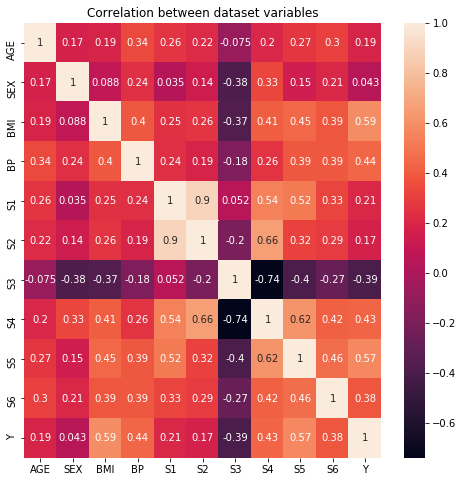

In [5]:
#print a graph for correlation
plt.figure(figsize=(8,8))
plt.title('Correlation between dataset variables')
sns.heatmap(df.corr(), annot=True)

What we are seeing is a correlation between the data.

Data with an extremely positive or negative value have a stronger correlation.

For example S1 and S2 both increase and have a positive correlation between them, which might make it redundant to keep either of them.
S3 and S4 are also closely related, as they have a correlation value close to -1. As one increases, the other decreases.

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#separating labels from target
X = df.drop('Y', axis=1)
y = df.Y

#spliting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=9) #test_size is for the size of test set


#### Linear Regression

We procede to make a linear regression. This model doesn't need scaling.

In [7]:
# Create linear regression object
regr = LinearRegression()

# Training our model with training sets
regr.fit(X_train, y_train)

# Make predictions with testing set
pred = regr.predict(X_test)

# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, pred))

Coefficient of determination: 0.59


I used the r2_score hyperparameter to evaluate my ML model.
R2 score is a metric that tells me if my model is good, the closer the value is to 1. In this case r2 is 0.59, so the model it's good to make prediction.

#### Random Forest Regressor

In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold

kf= KFold(n_splits=10)#cross validation 

#scaling data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#defining parameters
parameters = {'n_estimators':[100], #[10,20,50,100,200],
              'max_features': ['auto'],
              'max_samples': [9], #[2,3,4,6,7,8,9],
              'max_depth': [5], #[2,3,4,5,6,7,8,9],
             }

rf=RandomForestRegressor()
gs = GridSearchCV(rf,parameters, cv=5) #validation for Random Forest

gs.fit(X_train, y_train)
rf=gs.best_estimator_
print(rf)

rfpred = gs.predict(X_test)

print('R2: %.2f' %r2_score(y_test, rfpred))

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=9, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
R2: 0.49


I got an r2 score of 0.49 as the best result.